<a href="https://colab.research.google.com/github/michellegallegoabril/EJERCICIOS-Y-PARCIALES/blob/main/4_Transformada_Laplace/Circuito_RLC_Paralelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio:**

 Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar:

 * i) Diagrama de polos y ceros
 * ii) Diagrama de bode
 * iii) Respuesta impulso
 * iv) Respuesta escalón
 * v) Respuesta rampa.

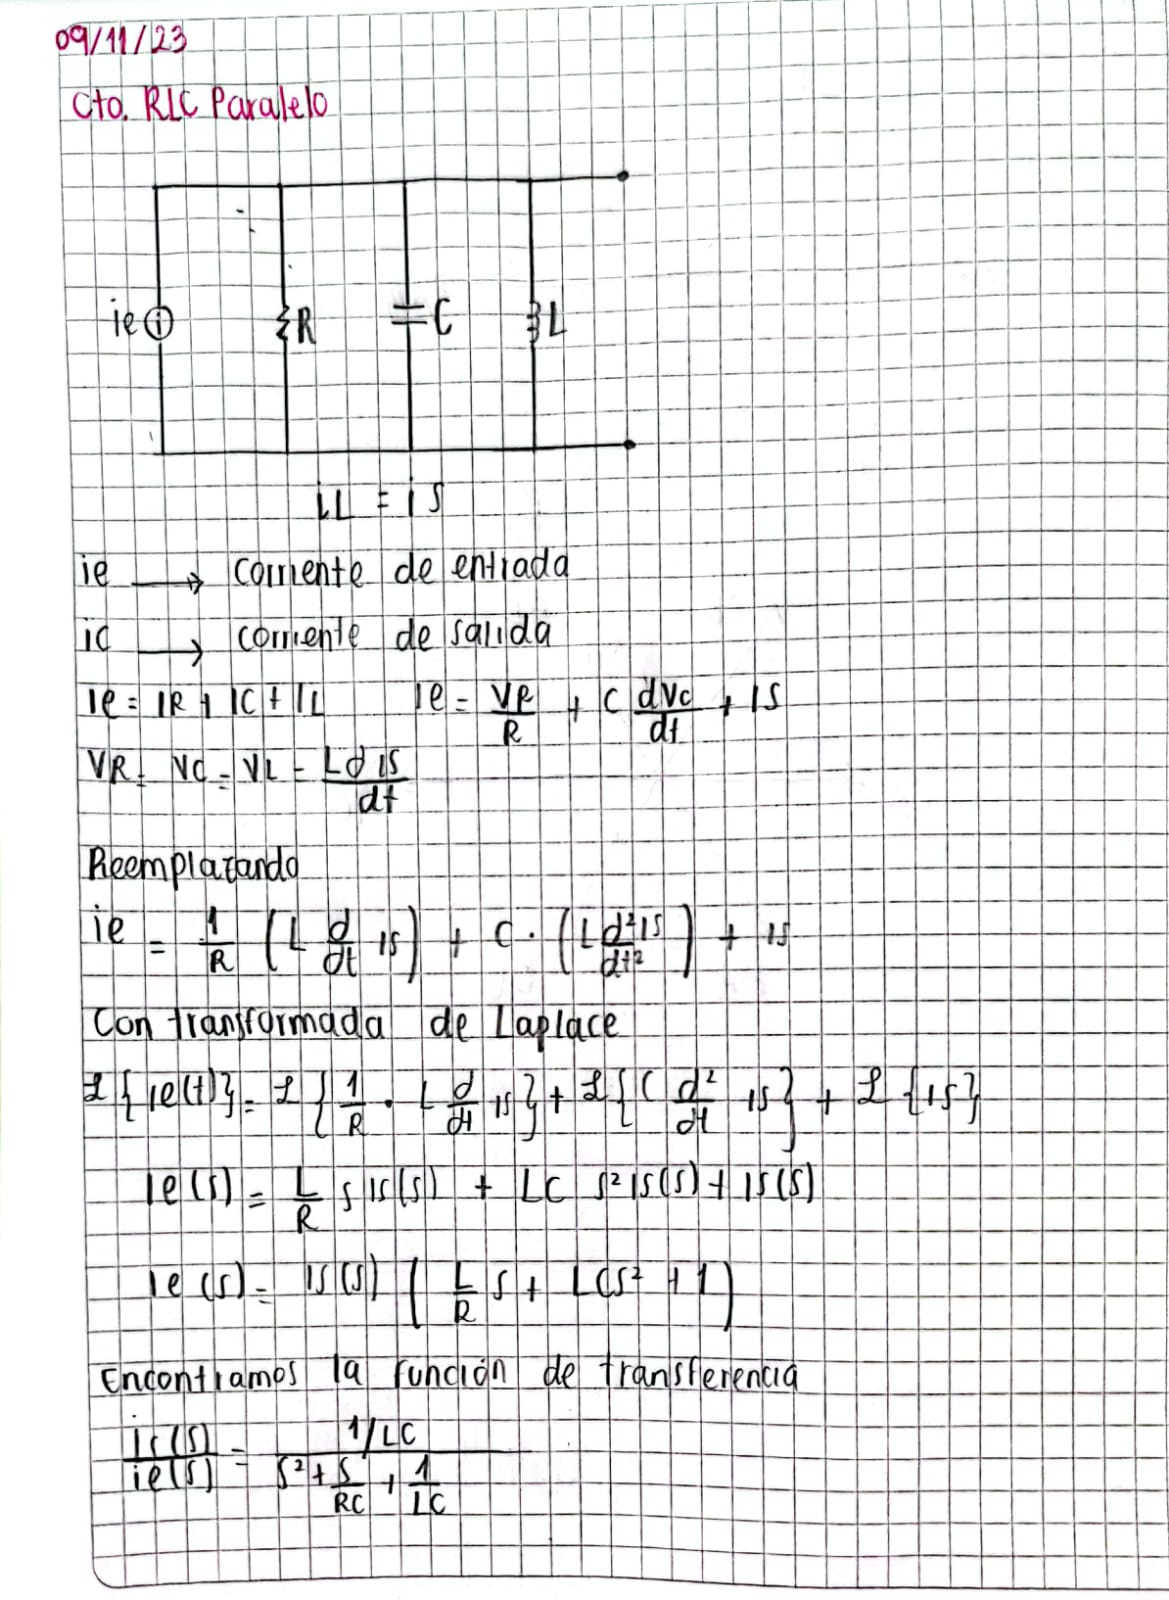

**Simulación:**

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, w = sym.symbols('t R L C omega', positive=True)
#Entrada de interés en Laplace
X = w / (s**2 + w**2) # Ajustar según tipo de entrada
H=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 1,s) #Funcion de transferencia con la API de control
H
#Hlc = H/(1+H) #para lazo cerrado
#print(H.poles())
Y = H.num * X /H.den#función de transferencia del circuito multiplicad
Y

             ω              
────────────────────────────
⎛ 2    2⎞ ⎛     2   L⋅s    ⎞
⎝ω  + s ⎠⋅⎜C⋅L⋅s  + ─── + 1⎟
          ⎝          R     ⎠

In [2]:
#Modelo en el tiempo en función de RLC
Ye = Y
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                 -t      ⎛     ____________⎞
                ─────    ⎜    ╱      2     ⎟
                2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟
           2⋅R⋅ℯ     ⋅sin⎜─────────────────⎟
sin(ω⋅t)                 ⎝     2⋅C⋅√L⋅R    ⎠
──────── + ─────────────────────────────────
   ω                     ____________       
                        ╱      2            
                   √L⋅╲╱  4⋅C⋅R  - L        

In [3]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Y.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

       -5⋅t                       
       ─────                      
         4      ⎛√55⋅t⎞           
4⋅√55⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  4  ⎠   sin(ω⋅t)
─────────────────────── + ────────
           11                ω    

In [4]:
#Función de salida Y(s) -- Laplace
Ye

          ω           
──────────────────────
          ⎛ 2        ⎞
⎛ 2    2⎞ ⎜s    s    ⎟
⎝ω  + s ⎠⋅⎜── + ─ + 1⎟
          ⎝5    2    ⎠

In [5]:
#Función de salida y(t) -- en tiempo
yt

       -5⋅t                       
       ─────                      
         4      ⎛√55⋅t⎞           
4⋅√55⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  4  ⎠   sin(ω⋅t)
─────────────────────── + ────────
           11                ω    

**Diagrama de polos y ceros utilizando la API de control**

In [6]:
poles = sym.roots(sym.denom(Ye), s) #se obtienen la raices del denominador
poles

⎧                   5   √55⋅ⅈ       5   √55⋅ⅈ   ⎫
⎨-ⅈ⋅ω: 1, ⅈ⋅ω: 1, - ─ - ─────: 1, - ─ + ─────: 1⎬
⎩                   4     4         4     4     ⎭

In [7]:
zeros = sym.roots(sym.numer(Ye), s) #raíces del numerador
zeros

{}

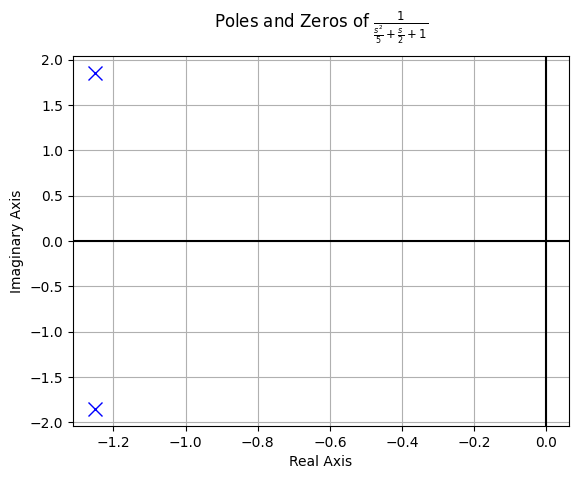

In [8]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

**Diagrama de bode**

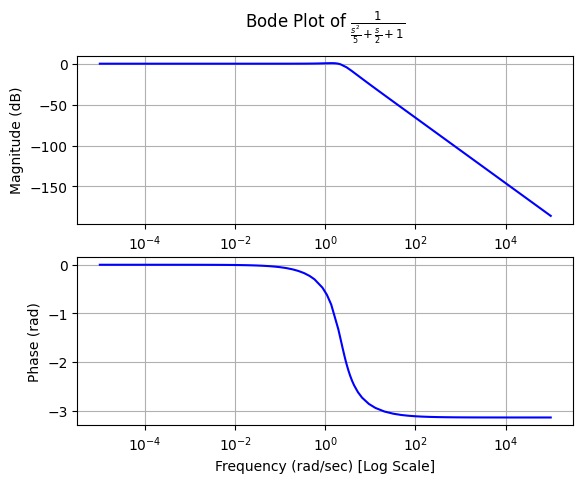

In [9]:
control.bode_plot(HRLC)

**Respuesta al impulso**

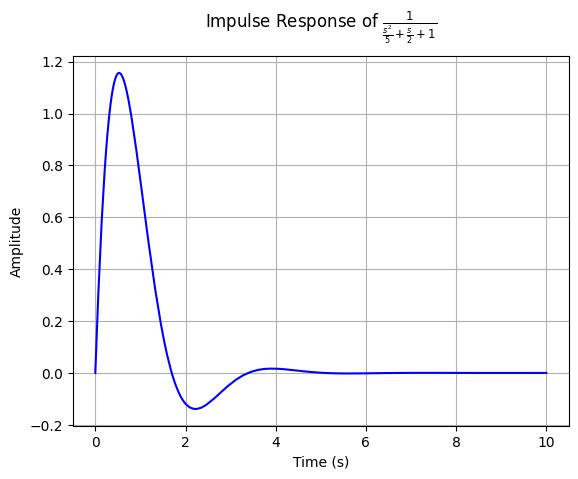

In [10]:
control.impulse_response_plot(HRLC)

**Respuesta al escalon**

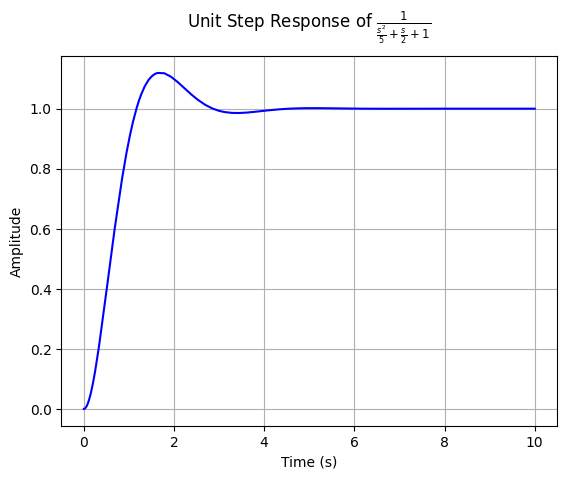

In [11]:
control.step_response_plot(HRLC)

**Respuesta a la rampa**

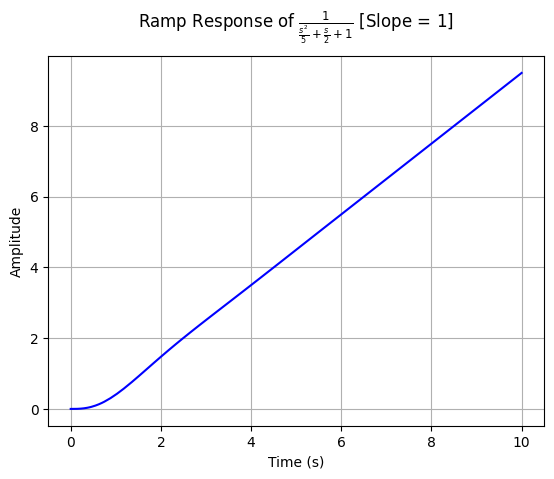

In [12]:
control.ramp_response_plot(HRLC)